In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mlp
from statsmodels.tsa.stattools import adfuller
mlp.style.use("seaborn")
%matplotlib inline

np.random.seed(42)

In [2]:
timeseries = pd.date_range(start="01-01-2000", end="31-12-2021", freq="MS")
timeseries

DatetimeIndex(['2000-01-01', '2000-02-01', '2000-03-01', '2000-04-01',
               '2000-05-01', '2000-06-01', '2000-07-01', '2000-08-01',
               '2000-09-01', '2000-10-01',
               ...
               '2021-03-01', '2021-04-01', '2021-05-01', '2021-06-01',
               '2021-07-01', '2021-08-01', '2021-09-01', '2021-10-01',
               '2021-11-01', '2021-12-01'],
              dtype='datetime64[ns]', length=264, freq='MS')

In [3]:
price = np.random.randint(low=1000, size=len(timeseries))

In [4]:
data = {"date": timeseries, "cost": price}

In [5]:
df = pd.DataFrame(data)
df

,date,cost
0,2000-01-01,102
1,2000-02-01,435
2,2000-03-01,860
3,2000-04-01,270
4,2000-05-01,106
...,...,...
259,2021-08-01,974
260,2021-09-01,826
261,2021-10-01,373
262,2021-11-01,671


In [6]:
df.set_index(keys=["date"], inplace=True)
df

,cost
date,
2000-01-01,102
2000-02-01,435
2000-03-01,860
2000-04-01,270
2000-05-01,106
...,...
2021-08-01,974
2021-09-01,826
2021-10-01,373


<AxesSubplot:xlabel='date'>

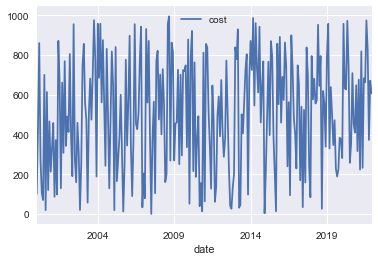

In [7]:
df.plot()

In [8]:
def test_for_stationary (feature, df, window=10):
    means = df[feature].rolling(window=window).mean()
    stds = df[feature].rolling(window=window).std()

    fg, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,6))
    means.plot(ax=ax[0], label="Rolling Mean")
    stds.plot(ax=ax[1], label="Rolling Stds")
    plt.legend(loc="best")

    plt.figure(figsize=(16,6))
    df[feature].plot(color="blue", label="Original")
    means.plot(color="yellow", label="Rolling Mean")
    stds.plot(color="red", label="Rolling StandardDeviation")
    plt.legend(loc="best")

    results = adfuller (df[feature].dropna())
    labels = ["ADF Values", "P Value", "Lags", "No of Observations"]

    for l,r in zip(labels, results):
        print (l, ":", r, sep="\t")

    return ("Stationary Data" if results[1] <= 0.05 else "Non Stationary")
    

ADF Values	:	-15.791196406669513
P Value	:	1.1016764442351345e-28
Lags	:	0
No of Observations	:	263


'Stationary Data'

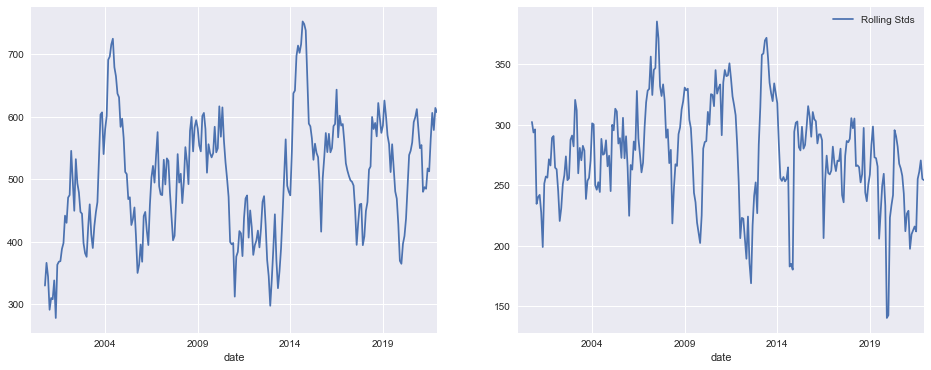

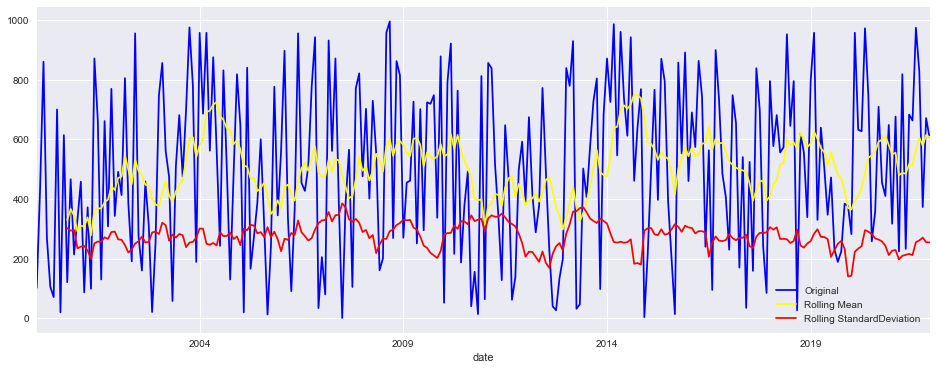

In [9]:
test_for_stationary(feature="cost", df=df)

In [10]:
df_log = np.log(df["cost"])

In [11]:
df["log_transformed"] = df_log

ADF Values	:	-15.739370088627638
P Value	:	1.2613255204911642e-28
Lags	:	0
No of Observations	:	263


'Stationary Data'

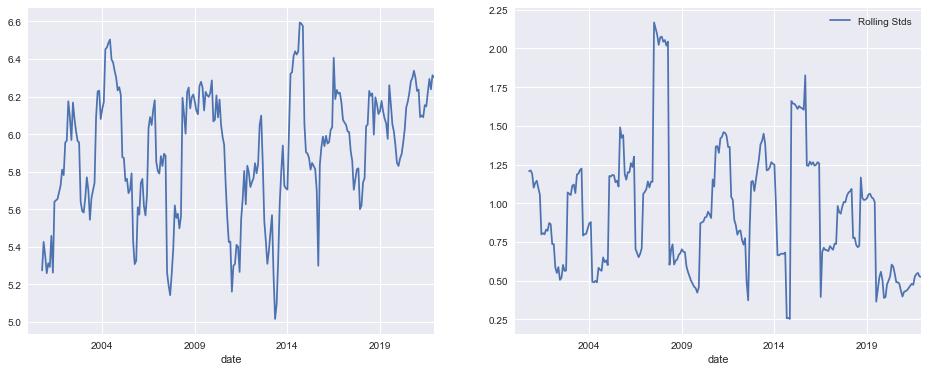

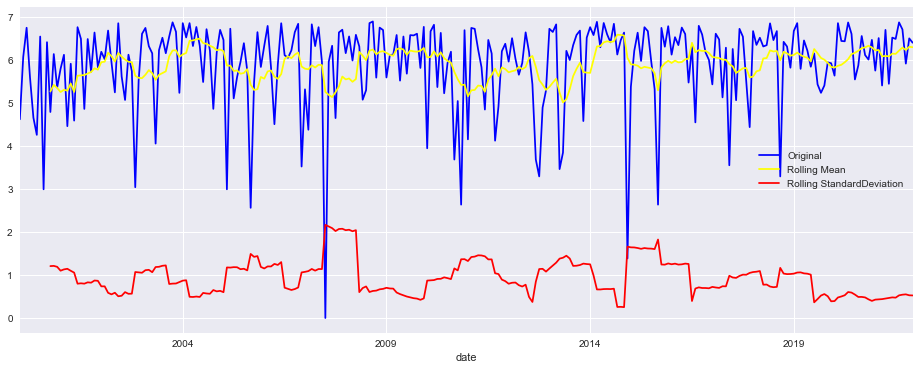

In [12]:
test_for_stationary(feature="log_transformed", df=df)

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [14]:
def perform_seasonal_decomposed (param):
    decomposed = seasonal_decompose(param)
    decomposed.plot()


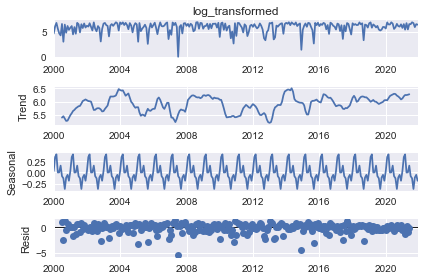

In [15]:
perform_seasonal_decomposed(df["log_transformed"])

In [16]:
df_log_diff = df_log - df_log.shift(1)

In [17]:
df["log_diff"] = df_log_diff

In [18]:
df

,cost,log_transformed,log_diff
date,,,
2000-01-01,102,4.624973,NaN
2000-02-01,435,6.075346,1.450373
2000-03-01,860,6.756932,0.681586
2000-04-01,270,5.598422,-1.158510
2000-05-01,106,4.663439,-0.934983
...,...,...,...
2021-08-01,974,6.881411,0.384636
2021-09-01,826,6.716595,-0.164817
2021-10-01,373,5.921578,-0.795016


<AxesSubplot:xlabel='date'>

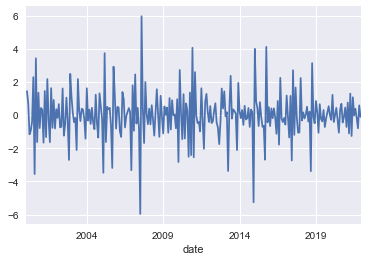

In [19]:
df["log_diff"].plot()

ADF Values	:	-8.313396371236498
P Value	:	3.736263127039645e-13
Lags	:	10
No of Observations	:	252


'Stationary Data'

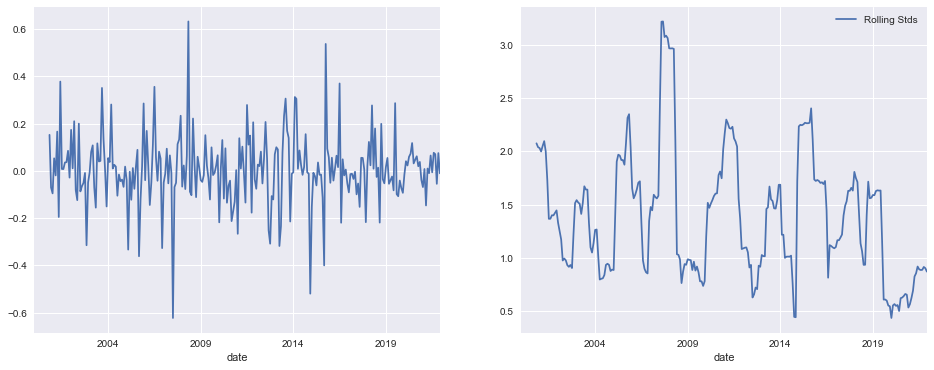

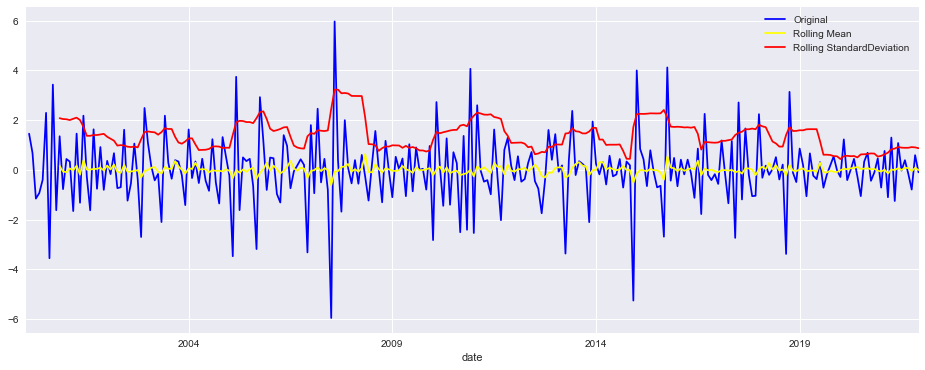

In [20]:
test_for_stationary(feature="log_diff", df=df)

In [21]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

/opt/anaconda3/lib/python3.8/site-packages/matplotlib/axes/_base.py:2283: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


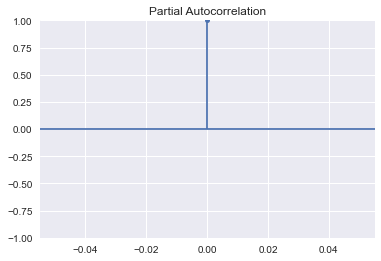

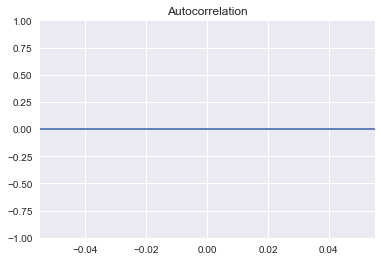

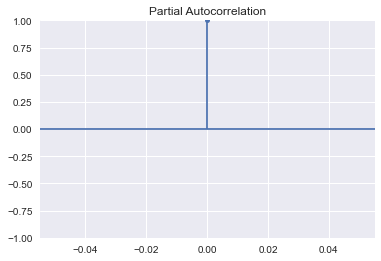

In [22]:
plot_acf(df["log_diff"])
plot_pacf(df["log_diff"])

In [23]:
# !pip install pmdarima
from pmdarima import auto_arima

In [24]:
autoarima_model = auto_arima(
    y=df["log_diff"].dropna(), trace=True, suppress_warnings=True)
autoarima_model.summary()


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.25 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=939.392, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=868.426, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.11 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=937.398, Time=0.00 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=847.577, Time=0.02 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=836.112, Time=0.03 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=825.626, Time=0.04 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=819.119, Time=0.05 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.30 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.27 sec
 ARIMA(5,0,0)(0,0,0)[0]             : AIC=817.153, Time=0.03 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=823.646, Time=0.02 sec
 ARIMA(5,0,1)(0,0,0)[0]             : AIC=779.089, Time=0.10 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=777.138, Time=0.09 se

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1


 ARIMA(0,0,2)(0,0,0)[0]             : AIC=772.433, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=866.436, Time=0.01 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=inf, Time=0.14 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0]          
Total fit time: 1.730 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  263
Model:               SARIMAX(0, 0, 1)   Log Likelihood                -383.297
Date:                Thu, 11 Nov 2021   AIC                            770.595
Time:                        09:46:07   BIC                            777.739
Sample:                             0   HQIC                           773.466
                                - 263                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9866      0.026    -38.239      0.000      -1.037      -0.936
sigma2         1.0652      0.063     16.789      0.000       0.941       1.190
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):               606.92
Prob(Q):                              0.79   Prob(JB):                         0.00
Heteroskedasticity (H):               0.85   Skew:                            -2.12
Prob(H) (two-sided):                  0.46   Kurtosis:                         9.11
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [25]:
from statsmodels.tsa.arima.model import ARIMA

In [26]:
_arima_model = ARIMA(df["log_diff"], 
order=autoarima_model.order, 
seasonal_order=autoarima_model.seasonal_order)


/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [27]:
arima_results = _arima_model.fit()

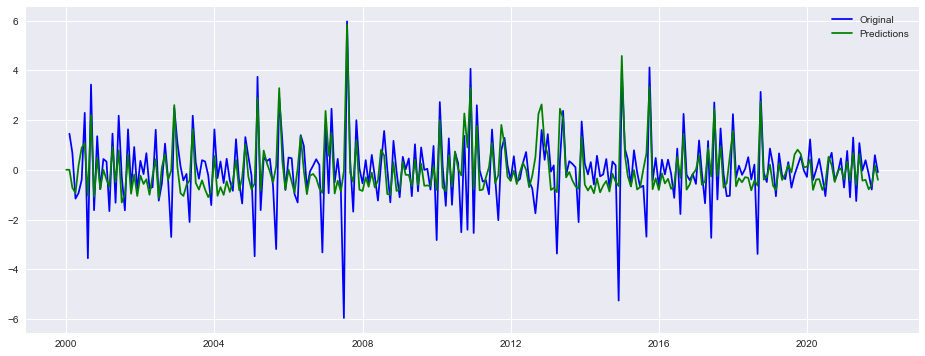

In [28]:
plt.figure(figsize=(16,6))
plt.plot(df["log_diff"], color="blue", label="Original")
plt.plot(arima_results.fittedvalues, color="green", label="Predictions")
plt.legend(loc="best")


In [29]:
# arima_results.fittedvalues
pd.DataFrame({"Log_Diff": df_log_diff, "Predictions": arima_results.fittedvalues})

,Log_Diff,Predictions
date,,
2000-01-01,NaN,0.001524
2000-02-01,1.450373,0.001524
2000-03-01,0.681586,-0.722901
2000-04-01,-1.158510,-0.934802
2000-05-01,-0.934983,0.169305
...,...,...
2021-08-01,0.384636,-0.403409
2021-09-01,-0.164817,-0.783490
2021-10-01,-0.795016,-0.614778


In [30]:
arima_diff_predictions = pd.Series(arima_results.fittedvalues, copy=True)
arima_diff_predictions

date
2000-01-01    0.001524
2000-02-01    0.001524
2000-03-01   -0.722901
2000-04-01   -0.934802
2000-05-01    0.169305
                ...   
2021-08-01   -0.403409
2021-09-01   -0.783490
2021-10-01   -0.614778
2021-11-01    0.181073
2021-12-01   -0.403049
Length: 264, dtype: float64

In [31]:
arima_diff_predictions_cumsum = arima_diff_predictions.cumsum()
arima_diff_predictions_cumsum

date
2000-01-01    0.001524
2000-02-01    0.003047
2000-03-01   -0.719854
2000-04-01   -1.654656
2000-05-01   -1.485351
                ...   
2021-08-01   -2.757855
2021-09-01   -3.541345
2021-10-01   -4.156123
2021-11-01   -3.975050
2021-12-01   -4.378099
Length: 264, dtype: float64

In [32]:
arima_log_predictions = pd.Series(df_log.iloc[0], index=df_log.index)
arima_log_predictionss = arima_log_predictions.add( arima_diff_predictions_cumsum, fill_value=0 )

In [33]:
arima_log_predictionss

date
2000-01-01    4.626496
2000-02-01    4.628020
2000-03-01    3.905119
2000-04-01    2.970317
2000-05-01    3.139622
                ...   
2021-08-01    1.867118
2021-09-01    1.083628
2021-10-01    0.468849
2021-11-01    0.649923
2021-12-01    0.246874
Length: 264, dtype: float64

In [34]:
plt.figure(figsize=(16,6))
predictions_arima = np.exp(arima_log_predictionss)
predictions_arima

date
2000-01-01    102.155520
2000-02-01    102.311277
2000-03-01     49.655969
2000-04-01     19.498101
2000-05-01     23.095141
                 ...    
2021-08-01      6.469621
2021-09-01      2.955382
2021-10-01      1.598154
2021-11-01      1.915393
2021-12-01      1.280017
Length: 264, dtype: float64

<Figure size 1152x432 with 0 Axes>

In [35]:
df["predictions"] = np.int64(predictions_arima)

In [36]:
df

,cost,log_transformed,log_diff,predictions
date,,,,
2000-01-01,102,4.624973,NaN,102
2000-02-01,435,6.075346,1.450373,102
2000-03-01,860,6.756932,0.681586,49
2000-04-01,270,5.598422,-1.158510,19
2000-05-01,106,4.663439,-0.934983,23
...,...,...,...,...
2021-08-01,974,6.881411,0.384636,6
2021-09-01,826,6.716595,-0.164817,2
2021-10-01,373,5.921578,-0.795016,1


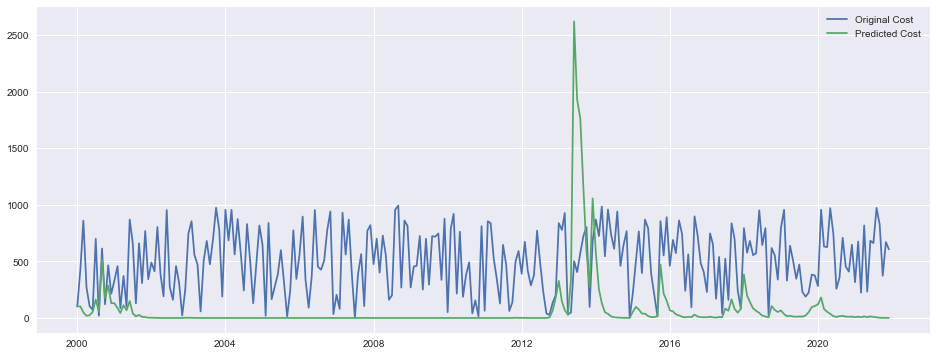

In [37]:
plt.figure(figsize=(16,6))
plt.plot(df["cost"], label="Original Cost")
plt.plot(df["predictions"], label="Predicted Cost")
plt.legend(loc="best")

In [38]:
rmse_error = np.sqrt((sum( predictions_arima - df["cost"] ) ** 2) / len(df))
print ("RMSE Error: ", rmse_error)

RMSE Error:  7005.901682860044


In [39]:
dff = df[["cost"]]

In [40]:
dff

,cost
date,
2000-01-01,102
2000-02-01,435
2000-03-01,860
2000-04-01,270
2000-05-01,106
...,...
2021-08-01,974
2021-09-01,826
2021-10-01,373


In [41]:
double_diff = dff.diff().diff()

In [42]:
dff["double_diff"] = double_diff

/var/folders/j9/0kcvbxzx0q1g6kh9nlh0jknr0000gn/T/ipykernel_25238/1497908211.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff["double_diff"] = double_diff


ADF Values	:	-8.461141255088176
P Value	:	1.5661456671720033e-13
Lags	:	16
No of Observations	:	245


'Stationary Data'

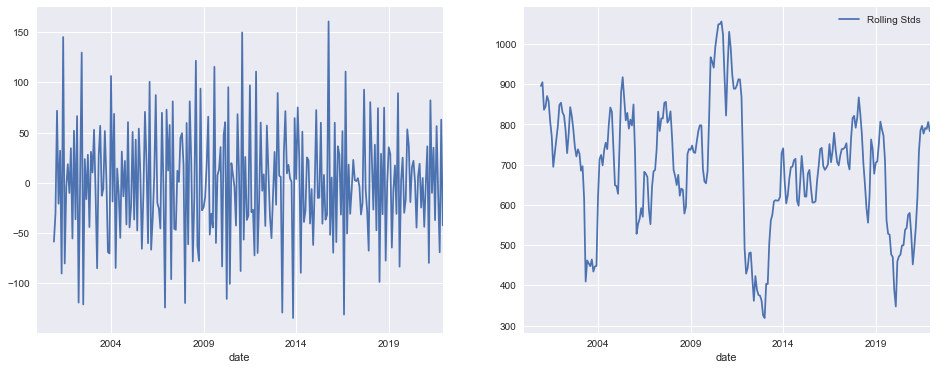

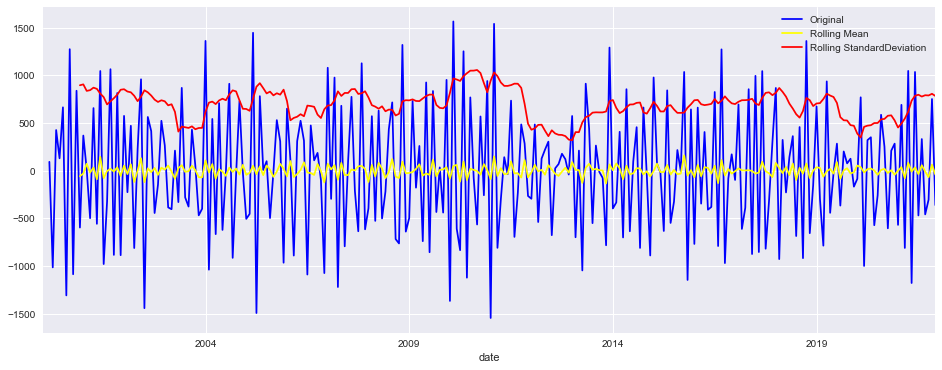

In [43]:
test_for_stationary(feature="double_diff", df=dff)

In [44]:
dff

,cost,double_diff
date,,
2000-01-01,102,NaN
2000-02-01,435,NaN
2000-03-01,860,92.0
2000-04-01,270,-1015.0
2000-05-01,106,426.0
...,...,...
2021-08-01,974,331.0
2021-09-01,826,-459.0
2021-10-01,373,-305.0


In [45]:
autoarima_model2 = auto_arima(double_diff.dropna(), trace=True, suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.29 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=4163.632, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=4013.777, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=4161.633, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=3950.344, Time=0.02 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=3901.118, Time=0.03 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=3867.626, Time=0.04 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=3862.996, Time=0.06 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.21 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.19 sec
 ARIMA(5,0,0)(0,0,0)[0]             : AIC=3860.998, Time=0.03 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=3865.620, Time=0.02 sec
 ARIMA(5,0,1)(0,0,0)[0]             : AIC=inf, Time=0.17 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=inf, Time=0.14 s

In [46]:
autoarima_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  262
Model:               SARIMAX(5, 0, 0)   Log Likelihood               -1924.499
Date:                Thu, 11 Nov 2021   AIC                           3860.998
Time:                        09:46:10   BIC                           3882.408
Sample:                             0   HQIC                          3869.603
                                - 262                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.3858      0.066    -21.038      0.000      -1.515      -1.257
ar.L2         -1.3420      0.104    -12.900      0.000      -1.546      -1.138
ar.L3         -1.0406      0.111     -9.353      0.000      -1.259      -0.823
ar.L4         -0.5713      0.105     -5.429      0.000      -0.778      -0.365
ar.L5         -0.1595      0.070     -2.270      0.023      -0.297      -0.022
sigma2       1.38e+05   1.33e+04     10.410      0.000    1.12e+05    1.64e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.85   Jarque-Bera (JB):                 1.59
Prob(Q):                              0.36   Prob(JB):                         0.45
Heteroskedasticity (H):               0.84   Skew:                            -0.10
Prob(H) (two-sided):                  0.43   Kurtosis:                         2.68
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [47]:
_arima_model2 = ARIMA (double_diff.dropna(), order=autoarima_model2.order, seasonal_order=autoarima_model2.seasonal_order)

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [48]:
results2 = _arima_model2.fit()

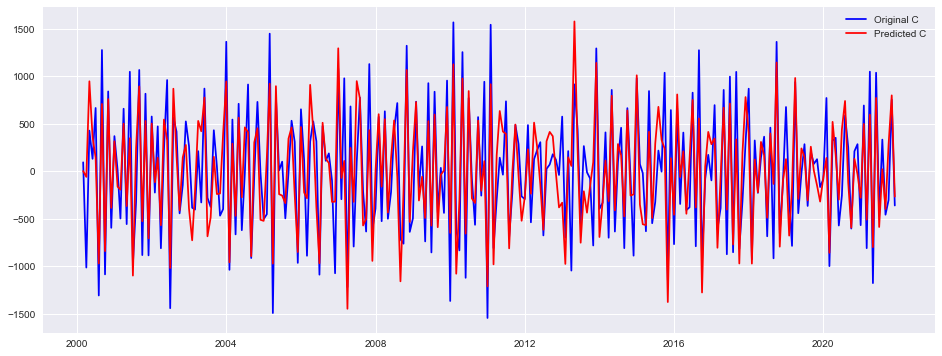

In [49]:
plt.figure(figsize=(16,6))
plt.plot(dff["double_diff"], color="blue", label="Original C")
plt.plot(results2.fittedvalues, color="red", label="Predicted C")
plt.legend(loc="best")

In [50]:
dfff = df[["cost"]]

In [51]:
autoarima_model3 = auto_arima(dfff, trace=True, suppress_warnings=True)
autoarima_model3.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=3738.375, Time=0.25 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=3730.940, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=3732.760, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=3732.759, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=4105.948, Time=0.00 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=3734.756, Time=0.02 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.323 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  264
Model:                        SARIMAX   Log Likelihood               -1863.470
Date:                Thu, 11 Nov 2021   AIC                           3730.940
Time:                        09:46:10   BIC                           3738.092
Sample:                             0   HQIC                          3733.814
                                - 264                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    501.0076     17.374     28.837      0.000     466.956     535.060
sigma2      7.917e+04   1.05e+04      7.514      0.000    5.85e+04    9.98e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.19   Jarque-Bera (JB):                14.52
Prob(Q):                              0.67   Prob(JB):                         0.00
Heteroskedasticity (H):               0.80   Skew:                            -0.07
Prob(H) (two-sided):                  0.29   Kurtosis:                         1.86
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [52]:
_arima_model3 = ARIMA(dfff, 
order=autoarima_model3.order, 
seasonal_order=autoarima_model3.seasonal_order)

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [53]:
results3 = _arima_model3.fit()

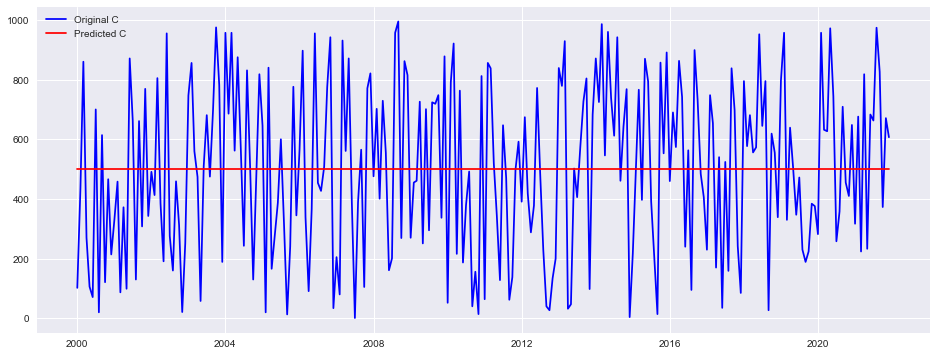

In [54]:
plt.figure(figsize=(16, 6))
plt.plot(dfff["cost"], color="blue", label="Original C")
plt.plot(results3.fittedvalues, color="red", label="Predicted C")
plt.legend(loc="best")


Don't know why ARIMA is not fitting / predicting well for either of these models and datasets

# Simple Exponential Smoothing

Simple Exponential Smoothing is used for time series prediction when the data particularly  does not follow any:

Trend: An upward or downward slope
Seasonality: Shows a particular pattern due to seasonal factors like Hours, days, Year, etc.
SES works on weighted averages i.e. the average of the previous level and current observation. Largest weights are associated with the recent observations and the smallest weights are associated with the oldest observations.

The decrease in weight is controlled by the smoothing parameter which is known as 

- 𝜶(alpha) here. 𝜶(alpha) value can be between 0 to 1:
- 𝜶(alpha)=0: Means that forecast for future value is the average of historical data.
- 𝜶(alpha)=1: Means that forecast for all future value is the value of the last observation    

In [55]:
from statsmodels.tsa.api import SimpleExpSmoothing

In [56]:
fdf = df[["cost"]]

In [57]:
fdf.tail()

,cost
date,
2021-08-01,974
2021-09-01,826
2021-10-01,373
2021-11-01,671
2021-12-01,607


In [58]:
instance1 = SimpleExpSmoothing(endog=fdf).fit(smoothing_level=0.2, optimized=False)
instance1_cast = instance1.forecast(3).rename("alpha=0.2")

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [59]:
instance2 = SimpleExpSmoothing(endog=fdf).fit(smoothing_level=0.8, optimized=False)
instance2_cast = instance2.forecast(3).rename("alpha=0.8")

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


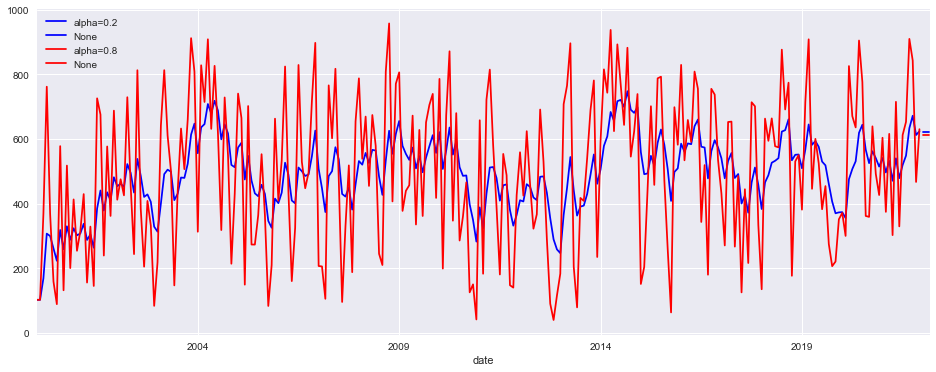

In [60]:
plt.figure(figsize=(16,6))
instance1_cast.plot(color="blue", legend=True)
instance1.fittedvalues.plot(color="blue")

instance2_cast.plot(color="red", legend=True)
instance2.fittedvalues.plot(color="red")

plt.legend()

In [61]:
fdf["predicted"] = instance2.fittedvalues

/var/folders/j9/0kcvbxzx0q1g6kh9nlh0jknr0000gn/T/ipykernel_25238/2479812926.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fdf["predicted"] = instance2.fittedvalues


<Figure size 432x288 with 0 Axes>

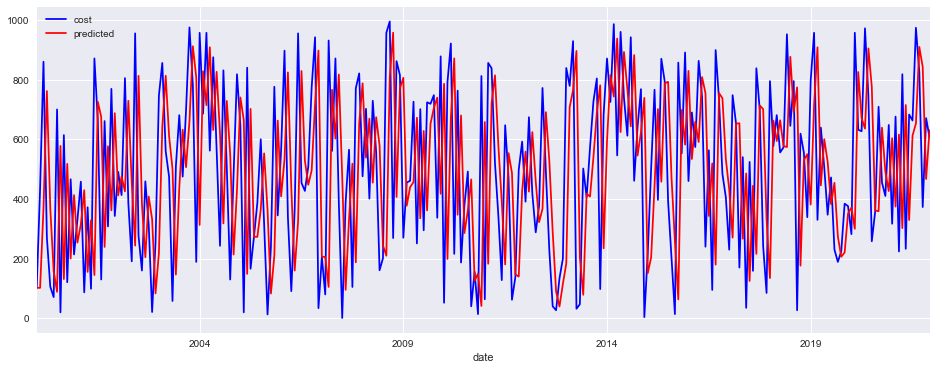

<Figure size 432x288 with 0 Axes>

In [62]:
plt.figure(figsize=(16,6))
fdf["cost"].plot(color="blue", legend=True)
fdf["predicted"].plot(color="red", legend=True)
plt.figure()

In [63]:
from sklearn.metrics import mean_squared_error

In [64]:
msqerror = mean_squared_error(y_true=fdf["cost"], y_pred=fdf["predicted"])
print ("RMSE Error : ", np.sqrt(msqerror))

RMSE Error :  358.62373173933764


Simple Exponential Smoothings Works Great even better than ARIMA Model

# Holt-Winters Exponential Smoothing

In [65]:
fdff = df[["cost"]]

In [66]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing as HWES

In [67]:
hmwes_model = HWES(endog=fdff, trend="add", seasonal="mul")

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [68]:
hwmes_fitted = hmwes_model.fit()

In [69]:
hwmes_fitted.summary()

Dep. Variable:,cost,No. Observations:,264
Model:,ExponentialSmoothing,SSE,23554319.482
Optimized:,True,AIC,3041.302
Trend:,Additive,BIC,3098.517
Seasonal:,Multiplicative,AICC,3044.094
Seasonal Periods:,12,Date:,"Thu, 11 Nov 2021"
Box-Cox:,False,Time:,09:46:11
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.0403568,alpha,True
smoothing_trend,0.0242137,beta,True


In [70]:
fdff["predictions"] = hwmes_fitted.fittedvalues

/var/folders/j9/0kcvbxzx0q1g6kh9nlh0jknr0000gn/T/ipykernel_25238/2735891646.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fdff["predictions"] = hwmes_fitted.fittedvalues


<AxesSubplot:xlabel='date'>

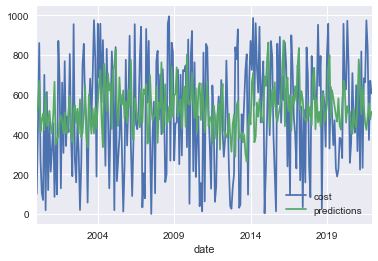

In [71]:
fdff.plot()

In [72]:
hwmes_forecast = hwmes_fitted.forecast(steps=36)

In [73]:
fdff_train = fdff[:-12]
fdff_test = fdff[-12:]

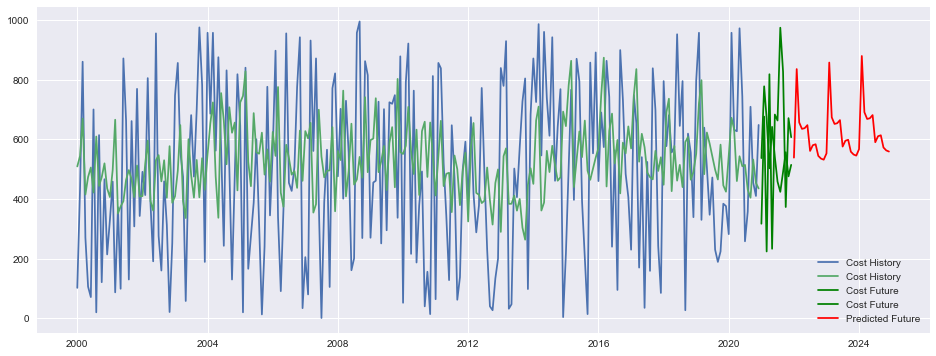

In [74]:
plt.figure(figsize=(16,6))
plt.plot(fdff_train, label="Cost History")
plt.plot(fdff_test, label="Cost Future", color="green")
plt.plot(hwmes_forecast, label="Predicted Future", color="red")
plt.legend()

In [75]:
msqerror = mean_squared_error(y_true=fdff["cost"], y_pred=fdff["predictions"])
print("RMSE Error : ", np.sqrt(msqerror))

RMSE Error :  298.69868953623813


**Holts Winter and Simple Exponential Smoothing Models working Relatively Well compared to ARIMA**

-- Sounish Nath